## Importation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/E-commerce/ecommerce_customer_data_custom_ratios.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


On remarque plusieurs choses :
1. La variable 'Purchase Date' soit la date de la commande, n'est pas de type date
2. La variable 'Returns' possède des valeurs manquantes. En sachant que 0 signifie qu'il n'y a pas eu de retour, nous supposons que les valeurs manquantes ne correspondent pas à un retour des articles achetés.

## Préparation des données

In [29]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

df['Purchase Month'] = pd.to_datetime(df['Purchase Date'].dt.month, errors='coerce')
df['Purchase Year'] = pd.to_datetime(df['Purchase Date'].dt.year, errors='coerce')
df['Purchase Day'] = pd.to_datetime(df['Purchase Date'].dt.day, errors='coerce')
df['Purchase Day of Week'] = df['Purchase Date'].dt.day_of_week

reverse_mapping = {
    0: 'Lundi',
    1: 'Mardi', 
    2: 'Mercredi',
    3: 'Jeudi',
    4: 'Vendredi',
    5: 'Samedi',
    6: 'Dimanche'
}

df['Purchase Day of Week'] = df['Purchase Day of Week'].map(reverse_mapping)
df['Purchase Day of Week']

0            Mardi
1           Samedi
2            Lundi
3            Jeudi
4         Vendredi
            ...   
249995       Jeudi
249996       Mardi
249997       Jeudi
249998    Mercredi
249999      Samedi
Name: Purchase Day of Week, Length: 250000, dtype: object

In [30]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
Purchase Month           0
Purchase Year            0
Purchase Day             0
Purchase Day of Week     0
dtype: int64

In [31]:
df['Returns'] = df['Returns'].fillna(0)

Nous vérifions s'il y a des doublons dans notre dataset avec la méthode drop_duplicates(), ce qui n'est pas le cas ici.

In [32]:
print(df.drop_duplicates(inplace = True))

None


## Visualisation

In [36]:
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if (df[i].dtype=='object'):
        categorical_columns.append(i)
    elif (df[i].dtype=='int64') | (df[i].dtype=='float64') | (df[i].dtype=='int32') | (df[i].dtype=='float32'):
        numerical_columns.append(i)
    else:
        print(f'Colonne {i} : dtype -> {df[i].dtype}, ni catégorielle ni numérique')

categorical_columns.remove('Customer Name')
print(f'Categorical columns : {categorical_columns}')
print(f'Numerical columns : {numerical_columns}')


Colonne Purchase Date : dtype -> datetime64[ns], ni catégorielle ni numérique
Colonne Purchase Month : dtype -> datetime64[ns], ni catégorielle ni numérique
Colonne Purchase Year : dtype -> datetime64[ns], ni catégorielle ni numérique
Colonne Purchase Day : dtype -> datetime64[ns], ni catégorielle ni numérique
Categorical columns : ['Product Category', 'Payment Method', 'Gender', 'Purchase Day of Week']
Numerical columns : ['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Age', 'Churn']


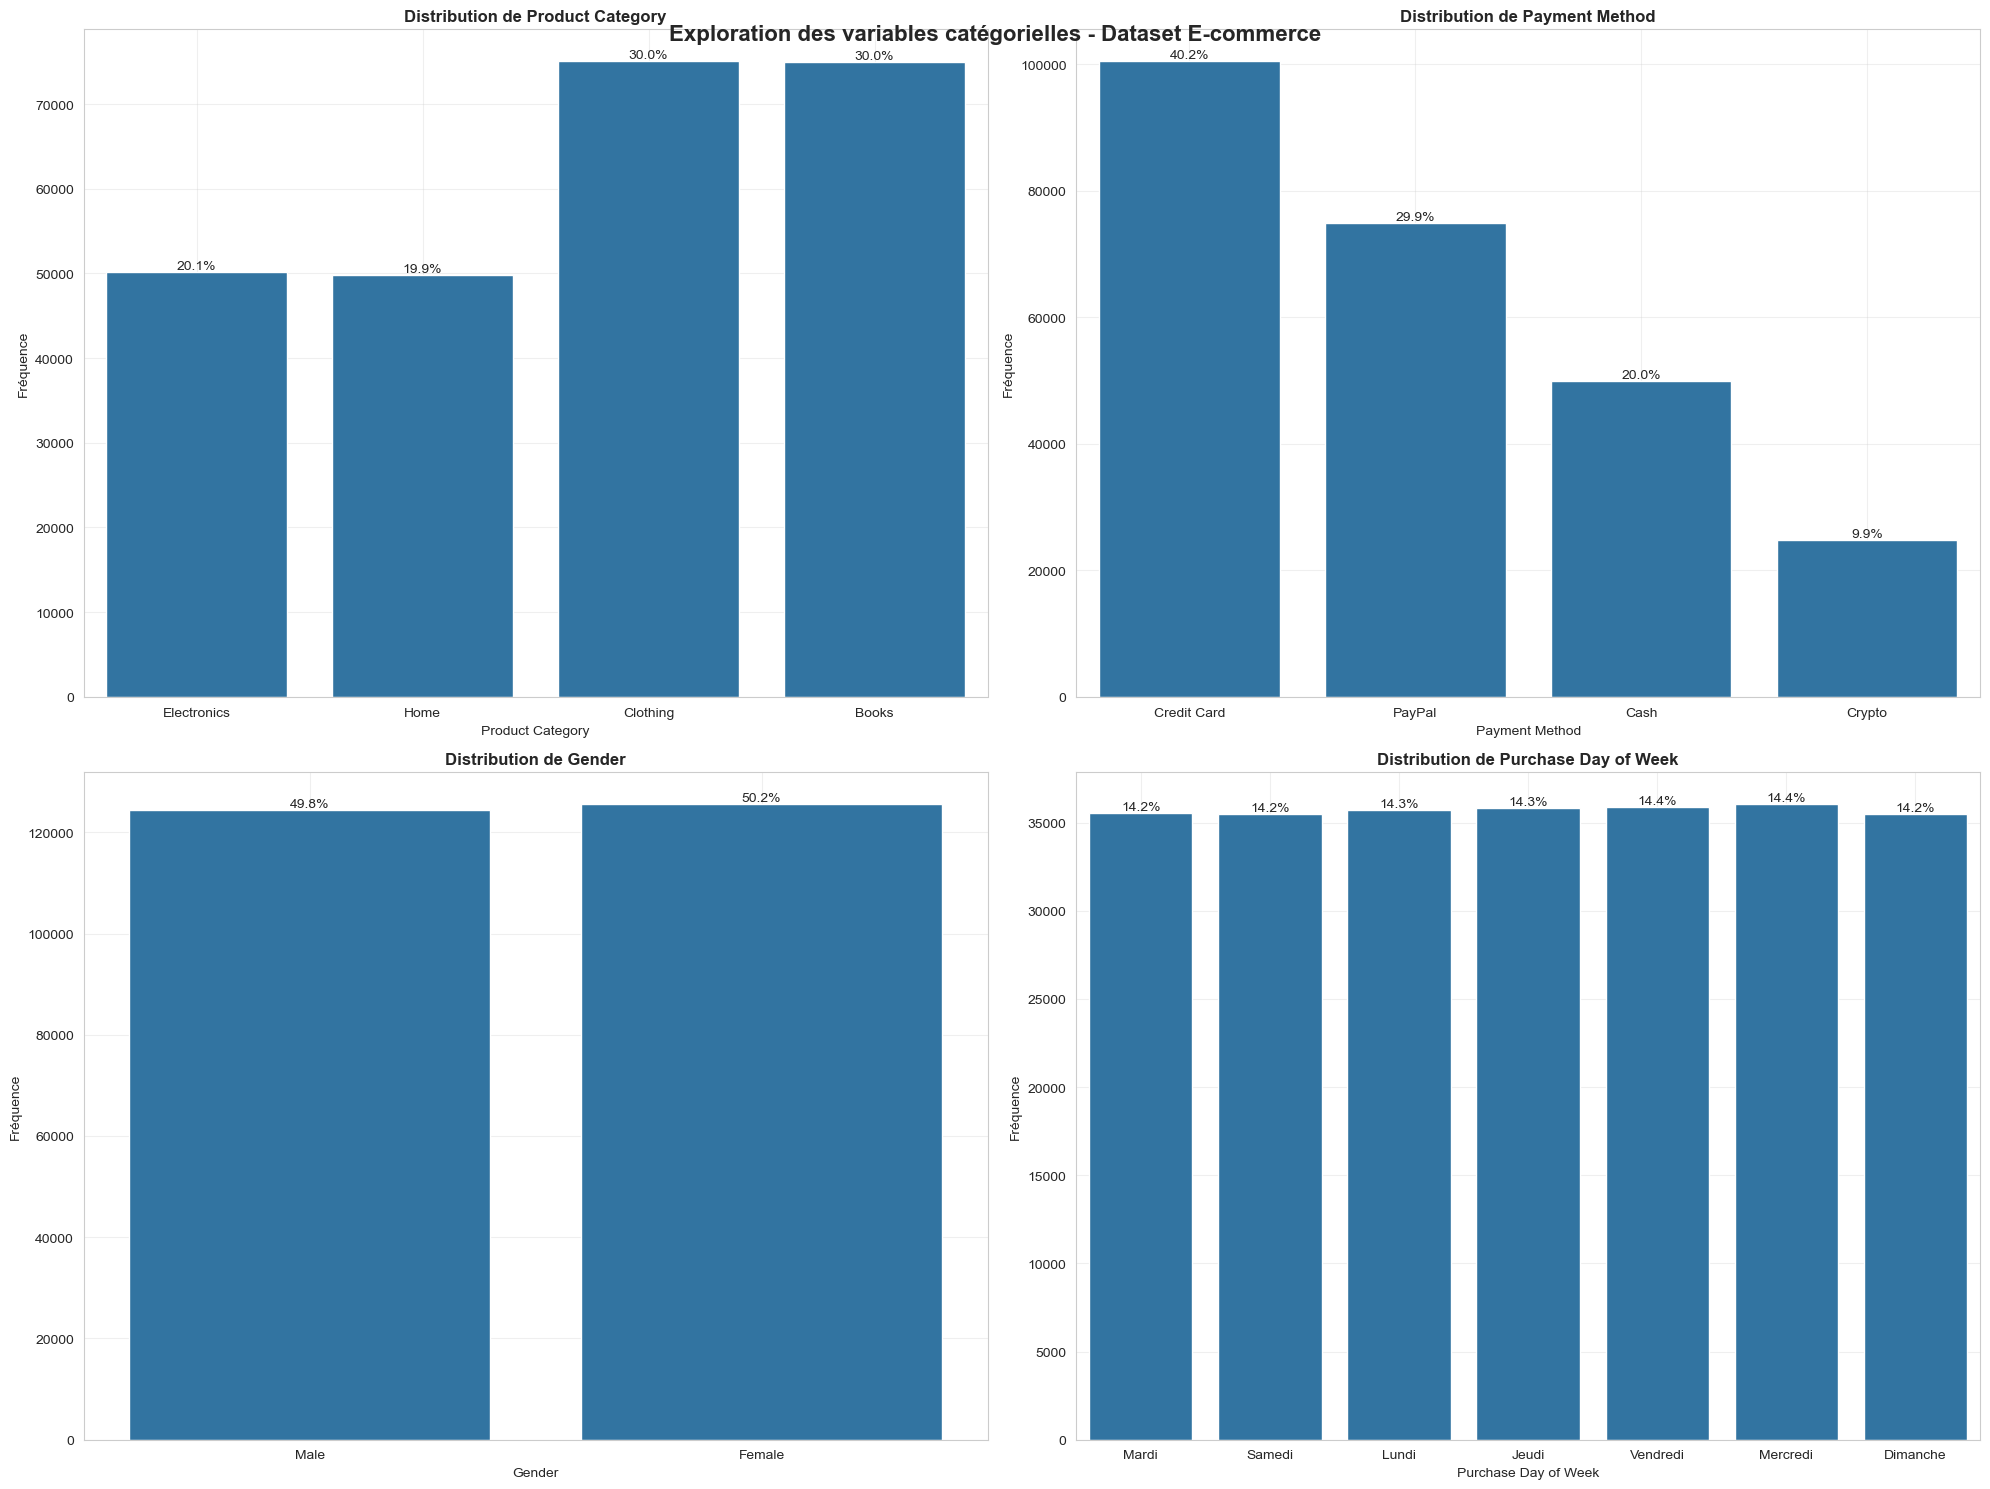

In [42]:
def categorical_graphics(df, categorical_columns, figsize=(20,15)):
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    plot_idx = 0

    for col in categorical_columns:
        ax = axes[plot_idx]
        sns.countplot(data=df, x=col, ax=ax)

        # Etiquettes de données
        total = len(df[col].dropna())
        for container in ax.containers:
            labels = [f'{v/total*100:.1f}%' for v in container.datavalues]
            ax.bar_label(container, labels=labels, fontsize=10)

        ax.set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        ax.grid(True, alpha=0.3)

        plot_idx += 1 
    
    plt.tight_layout()
    plt.suptitle('Exploration des variables catégorielles - Dataset E-commerce', fontsize=16, fontweight='bold')
    plt.show()

    return 

categorical_graphics(df,categorical_columns)

Dans notre jeu de données, les genres et les commandes selon les jours de la semaine sont équilibrés.
Nous distinguons 4 types de produits avec une plus grande présence de commandes de vêtements ou de livres qui représentent 60% des achats, suivi par l'électronique et les produits pour la maison. 
Les clients privilégient les règlements par carte bancaire (40%) et Paypal (30%), une minorité préfère régler par espèces (20%) ou en cryptomonnaie (10%).

In [11]:
def lineplot_purchase_month(sales_by_month):
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Graphique linéaire
    sns.lineplot(data=sales_by_month, 
                x='Purchase Month', 
                y='Total Purchase Amount',
                marker='o',
                markersize=8,
                linewidth=3,
                color='#2E86AB')
    
    plt.title('Monthly Sales Analysis', 
             fontsize=24, 
             fontweight='bold', 
             fontfamily='sans-serif',
             color='black',
             pad=20)
    
    plt.xlabel('Purchase Month', fontsize=12)
    plt.ylabel('Total Purchase Amount', fontsize=12)
    
    # Format des nombres
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    plt.tight_layout()
    
    return plt.gcf()

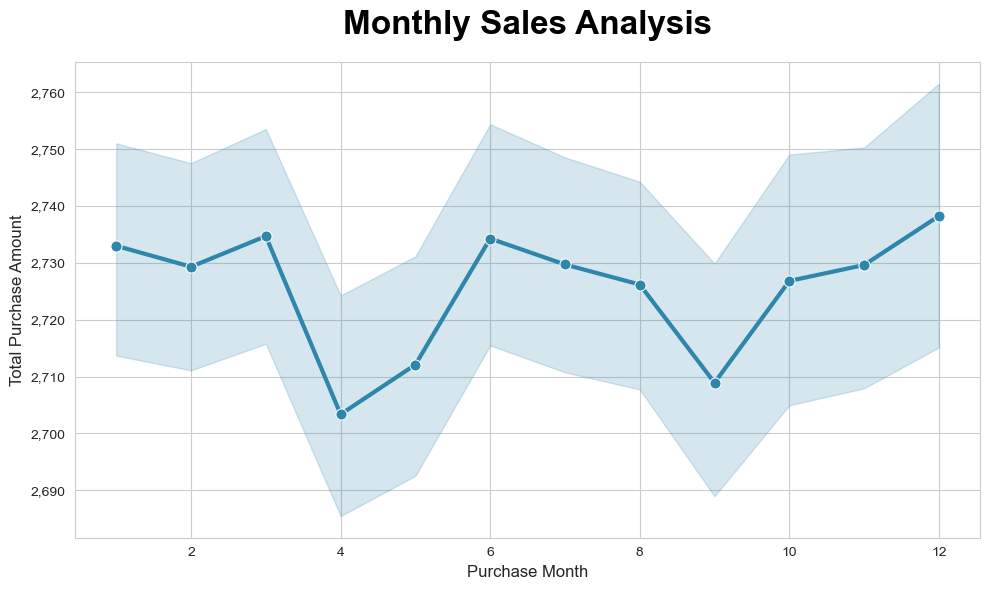

In [12]:
fig = lineplot_purchase_month(df)
plt.show()

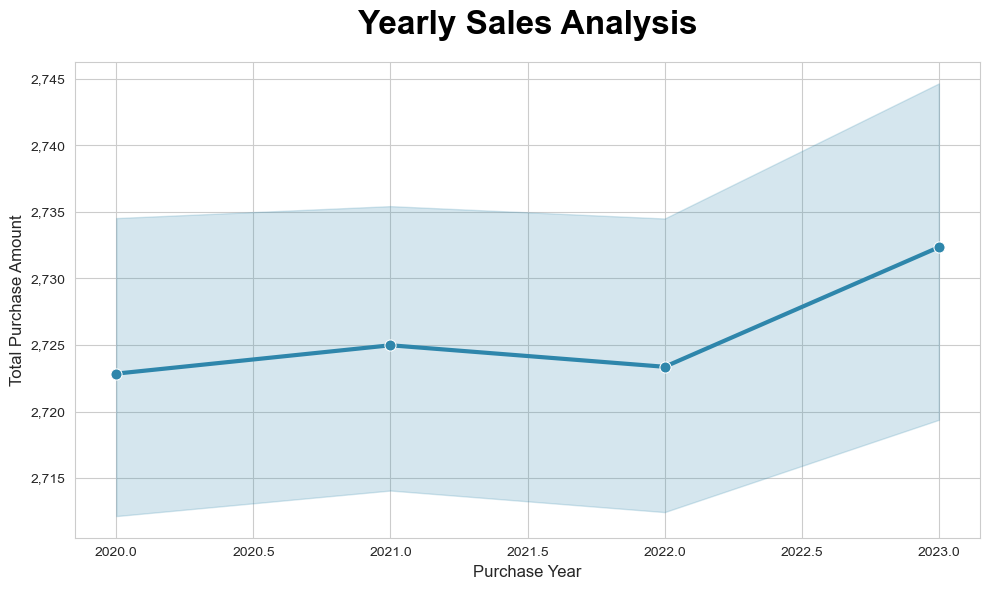

In [14]:
def lineplot_purchase_year(sales_by_year):

    sns.set_style("whitegrid")
    plt.figure(figsize=(10,6))

    # Graphique linéaire
    sns.lineplot(data=sales_by_year, 
                x='Purchase Year', 
                y='Total Purchase Amount',
                marker='o',
                markersize=8,
                linewidth=3,
                color='#2E86AB')
    
    plt.title('Yearly Sales Analysis', 
             fontsize=24, 
             fontweight='bold', 
             fontfamily='sans-serif',
             color='black',
             pad=20)
    
    plt.xlabel('Purchase Year', fontsize=12)
    plt.ylabel('Total Purchase Amount', fontsize=12)
    
    # Format des nombres
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    plt.tight_layout()
    
    return plt.gcf()

lineplot_purchase_year(df)
plt.show()
